 # Comparison of GFlowNets with MCMC methods in 2D for the 4-simplex.

 

In [167]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [379]:
import MCMC_2D
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import glob
from pathlib import Path
import math

In [390]:
iterationsNumber = 10**5
batchSize = 10000
burnFactor = 0
deviation = 0.8
spinJ = 4
gridLength = 2*spinJ+1

drawsFolderBase = "../data/2DComparison/iterations_"+str(iterationsNumber)+"_batch_size_"+str(batchSize)+"_burnin_"+str(burnFactor)+"_sigma_"+str(deviation)
verbosity = 0

drawsFolder = str(drawsFolderBase)+"/j_"+str(spinJ)+"/draws/"
os.makedirs(drawsFolder, exist_ok=True)

MCMC_2D.VertexMCMC(spinJ, iterationsNumber, batchSize, deviation, burnFactor, verbosity, drawsFolder, mean = 0.)

In [255]:
#dir = "../data/2DComparison/iterations_100_batch_size_10_burnin_0_sigma_0.8/j_4/draws/draws_batch_n_1.csv"
#dir = "../data/2DComparison/iterations_100000_batch_size_1000_burnin_0_sigma_0.8/j_4/draws/draws_batch_n_1.csv"
dir = "../data/2DComparison/iterations_1000_batch_size_100_burnin_0_sigma_0.8/j_4/draws/draws_batch_n_5.csv"
df = pd.read_csv(dir)
dimension1 = df.loc[:,"dimension1"].to_numpy().flatten()
dimension2 = df.loc[:,"dimension2"].to_numpy().flatten()
multiplicity = df.loc[:,"multiplicity"].to_numpy().flatten()
data = np.zeros(shape=(gridLength, gridLength))
print(dimension1)
#for i in range(multiplicity.size):
#    data[int(dimension1[i]), int(dimension2[i])] += multiplicity[i]

#axis = np.arange(gridLength)

#plt.xticks(axis, labels=axis.astype(str))
#plt.yticks(axis, labels=axis.astype(str))
#plt.imshow(data, cmap='viridis')
#plt.gca().set_title("Test")
#plt.gca().invert_yaxis()
#plt.show()
#plt.clf()

[6 6 0]


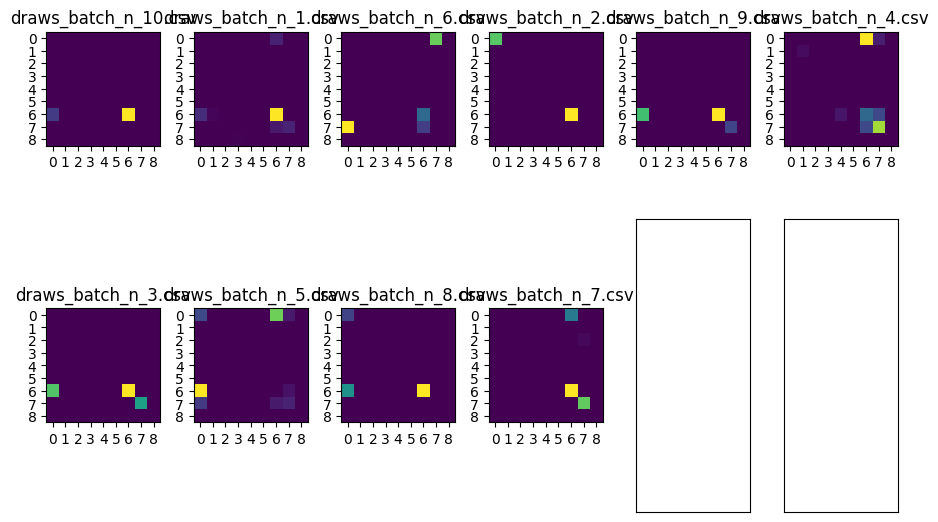

<Figure size 640x480 with 0 Axes>

In [398]:
dir = "../data/2DComparison/iterations_1000_batch_size_100_burnin_0_sigma_0.8/j_4/draws"

fileNumber = 0

for file in Path(dir).glob("**/*draw*"):
    fileNumber += 1

rows = 1

while(fileNumber % rows != 0):
    rows += 1

axis = np.arange(gridLength)

fig, axs = plt.subplots(nrows=math.ceil(fileNumber / 6.0), ncols=6, figsize=(9, 6), subplot_kw={'xticks': [], 'yticks': []})


for ax, file in zip(axs.flat, Path(dir).glob("**/*draw*")):
    df = np.genfromtxt(file, delimiter=',', skip_header=1)
    df = np.array(df)
    data = np.zeros(shape=(gridLength, gridLength))
    for i in range(df.shape[0]):
        data[int(df[i, 0]), int(df[i, 1])] += df[i, 2]
    
    ax.imshow(data, cmap='viridis', interpolation='nearest')
    ax.set_title(str(os.path.basename(file)))
    ax.set_xticks(axis, labels=axis.astype(str))
    ax.set_yticks(axis, labels=axis.astype(str))


plt.tight_layout()
plt.show()
plt.clf()



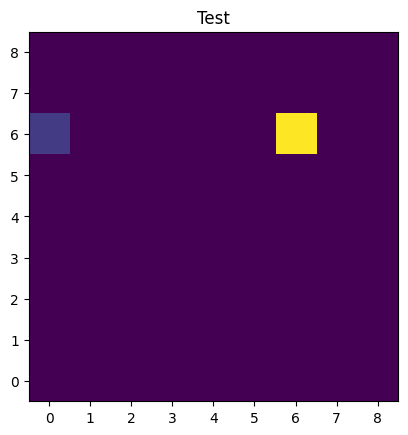

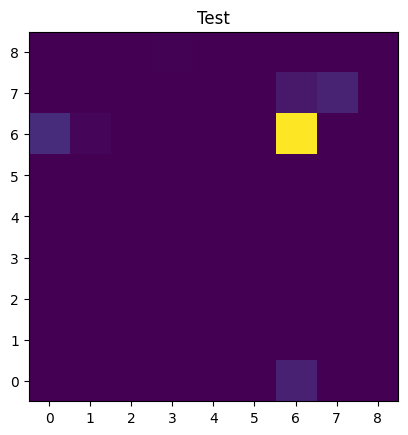

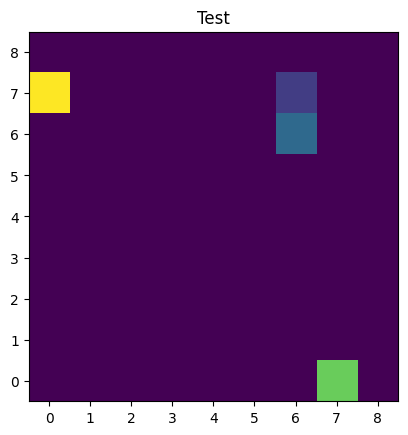

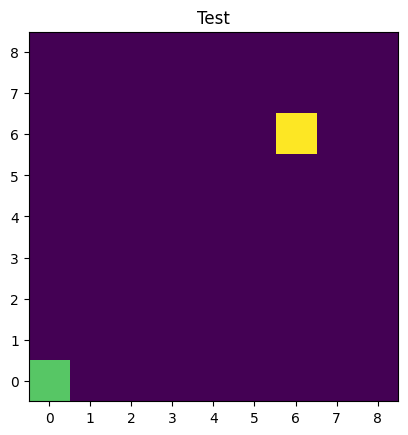

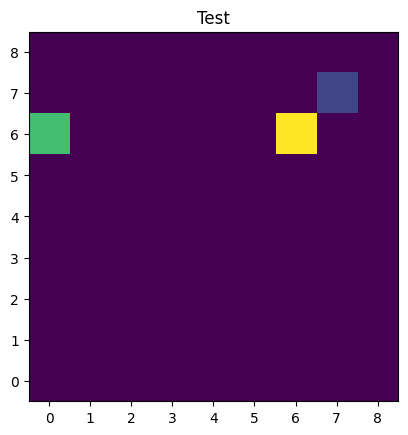

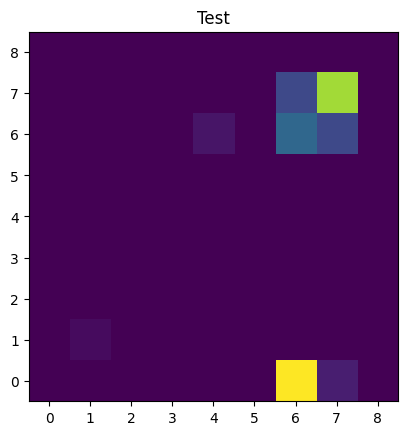

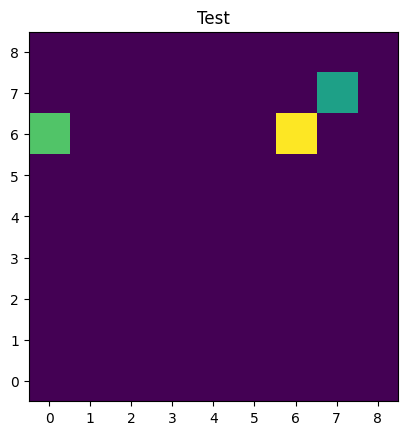

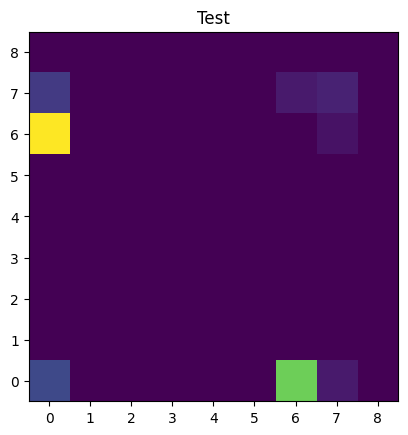

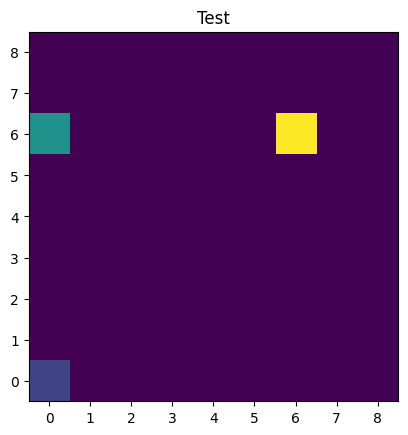

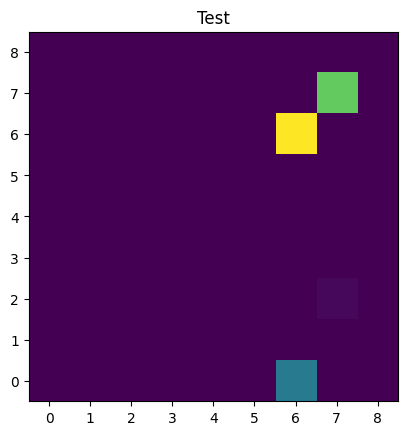

<Figure size 640x480 with 0 Axes>

In [391]:
dir = "../data/2DComparison/iterations_1000_batch_size_100_burnin_0_sigma_0.8/j_4/draws/"

fileNumber = 0

for file in Path(dir).glob("**/*draw*"):
    fileNumber += 1



axis = np.arange(gridLength)

for file in Path(dir).glob("**/*draw*"):
    df = np.genfromtxt(file, delimiter=',', skip_header=1)
    df = np.array(df)
    data = np.zeros(shape=(gridLength, gridLength))
    for i in range(df.shape[0]):
        data[int(df[i, 0]), int(df[i, 1])] += df[i, 2]
    plt.xticks(axis, labels=axis.astype(str))
    plt.yticks(axis, labels=axis.astype(str))
    plt.imshow(data, cmap='viridis')
    plt.gca().set_title("Test")
    plt.gca().invert_yaxis()
    plt.show()
    plt.clf()
    
    

